# Homework Assignment 3

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [1]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 45kB/s 
     |████████████████████████████████| 327kB 35.7MB/s 
     |████████████████████████████████| 86.4MB 47kB/s 
     |████████████████████████████████| 3.4MB 43.0MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 3.8MB 35.5MB/s 
     |████████████████████████████████| 450kB 28.4MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=038fed93130dcee9fe3484926118d51cdaece9ab1d343f5106d0da474e3bb3fc
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=01c146a7c002815553cbf6f7b574146280cf934f9f7ec7110b5c7984c2d91d14
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=54

In [3]:
!mkdir ./datasets
!mkdir ./datasets/library-collection

# download the dataset from Kaggle and unzip it
!kaggle datasets download city-of-seattle/seattle-library-collection-inventory  -f library-collection-inventory.csv -p ./datasets/library-collection/
!unzip ./datasets/library-collection/*.zip  -d ./datasets/library-collection
!ls ./datasets/library-collection
# ! grep -rnsi "mystery fiction" "./datasets/library-collection/library-collection-inventory.csv"

100% 3.77G/3.77G [00:48<00:00, 82.7MB/s]
100% 3.77G/3.77G [00:49<00:00, 82.6MB/s]
Archive:  ./datasets/library-collection/library-collection-inventory.csv.zip
  inflating: ./datasets/library-collection/library-collection-inventory.csv  
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [7]:
import turicreate as tc
import turicreate.aggregate as agg
%matplotlib inline

CSV_PATH = "./datasets/library-collection/library-collection-inventory.csv"

sf = tc.SFrame.read_csv(CSV_PATH, nrows=15000000)

Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.9127 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 158429 lines. Lines per second: 54830

Read 633885 lines. Lines per second: 74765.2

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 1108904 lines. Lines per second: 78906.7

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-10-01 ... :00:00.000
	8: 1

Read 1583786 lines. Lines per second: 80353.7

Read 2058239 lines. Lines per second: 80586.4

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 2691263 lines. Lines per second: 87831.5

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3323492 lines. Lines per second: 92944.5

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-11-01 ... :00:00.000
	8: 1

Read 3955167 lines. Lines per second: 94464.1

Read 4437353 lines. Lines per second: 92696.6

Read 4921517 lines. Lines per second: 91624.1

Read 5405425 lines. Lines per second: 90304.2

Read 5888741 lines. Lines per second: 89431.6

Read 6372050 lines. Lines per second: 88605.9

Read 6854771 lines. Lines per second: 87491.6

Read 7336799 lines. Lines per second: 86952.3

Read 7818996 lines. Lines per second: 86519.7

Read 8300537 lines. Lines per second: 86087

Read 8782147 lines. Lines per second: 85370.2

Read 9263355 lines. Lines per second: 84974.9

Read 9744360 lines. Lines per second: 84623.7

Read 10225169 lines. Lines per second: 84210.7

Read 10706084 lines. Lines per second: 83936.7

Read 11186676 lines. Lines per second: 83661.2

Read 11666922 lines. Lines per second: 83308.2

Read 12146869 lines. Lines per second: 83021.4

Read 12626390 lines. Lines per second: 82829

Read 13105967 lines. Lines per second: 81765.7

Read 13585401 lines. Lines per second: 81489.4

Read 14064281 lines. Lines per second: 81050.7

Read 14543355 lines. Lines per second: 80582.7

9 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 15000000 lines in 185.769 secs.

In [8]:
def find_popular_with_subject(subject):
    # reduce information
    sf_reduced = sf[["Title", "Subjects"]]
    # get all books with given subject in subjects list
    sf_reduced = sf_reduced[sf_reduced["Subjects"].apply(
                            lambda x: subject in x.lower())]
    g = sf_reduced.groupby('Title', {'Count': agg.COUNT()})
    g = g.sort("Count", ascending=False)
    return g[0]


find_popular_with_subject("mystery fiction")

{'Count': 643, 'Title': 'The late show / Michael Connelly.'}

**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [12]:
sf["Subjects"] = sf["Subjects"].apply(lambda x: x.lower())
# every element in subjects col is now a list
sf["Subjects"] = sf["Subjects"].apply(lambda x: x.split(","))
# separate subjects to different rows
sf = sf.stack("Subjects",  new_column_name='Subject')
# now let's remove all subjects that are not fiction related
sf = sf[sf["Subject"].apply(lambda x: "fiction" in x)]
g = sf.groupby('Subject', {'Count': agg.COUNT()})
g_top10 = g.sort("Count", ascending=False)[:10]
print(g_top10)



+--------------------------------+--------+
|            Subject             | Count  |
+--------------------------------+--------+
|          fiction films         | 527295 |
|         mystery fiction        | 361362 |
|       historical fiction       | 297538 |
|   fiction television programs  | 286837 |
|         fantasy fiction        | 217085 |
|  detective and mystery fiction | 202023 |
|        suspense fiction        | 188557 |
|         science fiction        | 172713 |
|        domestic fiction        | 160040 |
|   friendship juvenile fiction  | 157877 |
+--------------------------------+--------+
[10 rows x 2 columns]



Text(0.5, 0, 'Year')

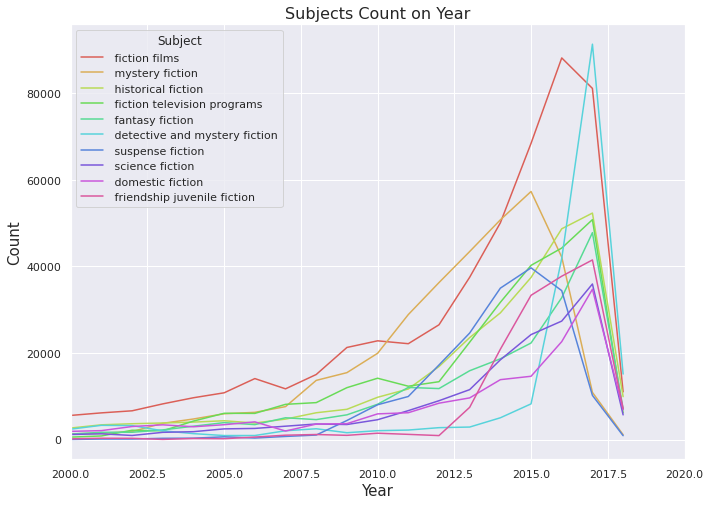

In [13]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

r = re.compile('\\d{4}')
def get_year(y_str):
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])
sf['Year'] = sf['PublicationYear'].apply(lambda s: get_year(s))

sns.set(rc={'figure.figsize':(11,8)}) # set figure size
color_pallete = dict(zip(g_top10["Subject"], sns.color_palette("hls", 10)))

for idx, subject in enumerate(g_top10["Subject"]):
    subject_by_year = sf[sf["Subject"] == subject]
    subject_by_year = subject_by_year.groupby('Year', {'Count': agg.COUNT()})
    subject_by_year["Subject"] = subject
    subject_by_year = subject_by_year.to_dataframe()
    s = sns.lineplot(x="Year", y="Count", hue="Subject", data=subject_by_year, palette=color_pallete)
    # had some problems with adding hue together with different colors for each line

plt.xlim(2000,2020)
s.set_title("Subjects Count on Year", fontsize=16)
s.set_ylabel("Count", fontsize=15)
s.set_xlabel("Year",  fontsize=15)

**Question 3:** Write a function that gets as input a subject name. The function returns the top-20 most _popular_ authors for the input subject (15pt).



In [14]:
def find_popular_author(subject):
    # get all books with given subject in subjects list
    # rows_without_author = sf[sf["Author"] == ""]
    sf_subject = sf.dropna(columns=["Author"])
    sf_subject = sf_subject[sf_subject["Subjects"].apply(
                            lambda x: subject.lower() in x.lower())]
    g = sf_subject.groupby('Author', {'Count': agg.COUNT()})
    g = g.sort("Count", ascending=False)
    return g[1:21]

sf = tc.SFrame.read_csv(CSV_PATH, nrows=15000000)
find_popular_author("Fiction Films")


Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.20444 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 158429 lines. Lines per second: 52900.7

Read 633885 lines. Lines per second: 71486.4

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 1108904 lines. Lines per second: 75314.5

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-10-01 ... :00:00.000
	8: 1

Read 1583786 lines. Lines per second: 75770

Read 2058239 lines. Lines per second: 78040.2

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 2532886 lines. Lines per second: 77348.8

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3007318 lines. Lines per second: 77167.6

Read 3481381 lines. Lines per second: 76480.1

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-11-01 ... :00:00.000
	8: 1

Read 3955167 lines. Lines per second: 77625.9

Read 4437353 lines. Lines per second: 77952.7

Read 4921517 lines. Lines per second: 78479.9

Read 5405425 lines. Lines per second: 79702.7

Read 6049926 lines. Lines per second: 81300.6

Read 6533079 lines. Lines per second: 82248.2

Read 7015427 lines. Lines per second: 83003.5

Read 7497468 lines. Lines per second: 81162.7

Read 7979800 lines. Lines per second: 81614.4

Read 8461210 lines. Lines per second: 81204.1

Read 8942541 lines. Lines per second: 80581.8

Read 9423844 lines. Lines per second: 79782.9

Read 9904635 lines. Lines per second: 79269.8

Read 10385547 lines. Lines per second: 78733.5

Read 10866196 lines. Lines per second: 78243.1

Read 11346805 lines. Lines per second: 77785.3

Read 11826794 lines. Lines per second: 77284.1

Read 12306548 lines. Lines per second: 76805.4

Read 12626390 lines. Lines per second: 76353.1

Read 13105967 lines. Lines per second: 75926.8

Read 13585401 lines. Lines per second: 75645.6

Read 14064281 lines. Lines per second: 75287.7

Read 14543355 lines. Lines per second: 74914.3

9 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 15000000 lines in 199.873 secs.

Author,Count
"Hart, Kevin, 1979-",204
"Fry, Jason, 1969-",192
"Beecroft, Simon",189
"Hidalgo, Pablo",186
"Gaffigan, Jim",158
"Ruditis, Paul",144
Rolling Stones,129
U2 (Musical group),97
"Jessen, Sebastian.",92
"Pryor, Richard, 1940-2005",84


Using the [The Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic by gender(5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender using Seaborn and PlotlyExpress(15pt)

In [15]:
!mkdir ./datasets/BIU-Blog-Authorship
!wget -O ./datasets/BIU-Blog-Authorship/blogs.zip http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip
!unzip /content/datasets/BIU-Blog-Authorship/*.zip  -d /content/datasets/BIU-Blog-Authorship/

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002831.male.23.indUnk.Aquarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002909.female.27.indUnk.Virgo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003064.male.15.Student.Capricorn.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003080.female.16.indUnk.Cancer.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003093.male.26.Student.Leo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003147.female.24.Tourism.Aries.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003245.female.16.indUnk.Sagittarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003260.male.24.Student.Pisces.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003282.female.17.Student.Aquarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003311.male.15.Student.Cancer.xm

In [22]:
import os
import json 

blogger_xml_dir = "/content/datasets/BIU-Blog-Authorship/blogs"

# We create a short code which parse the XML and convert it to JSON files
def get_posts_from_file(file_name):
    posts_dict = {}
    txt = open(file_name, "r",  encoding="utf8", errors='ignore').read()
    txt = txt.replace("&nbsp;", " ")
    for p in txt.split("</post>"):
        if "<post>" not in p or "<date>" not in p:
            continue
        post = p.split("<post>")[1].strip()
        dt = p.split("</date>")[0].split("<date>")[1].strip()
        posts_dict[dt] = post

    return posts_dict
            

def blogger_xml_to_json(file_name):
    l = file_name.split("/")[-1].split(".")
    if len(l) != 6:
        raise Exception("Could not analyze file f{file_name} - Length %s" % len(l) )
    j = {"id": l[0], "gender": l[1], "age":int(l[2]), "topic":l[3], "sign": l[4], "posts": get_posts_from_file(file_name)}
    return j

# converting all the XMLs to a single large JSON file
all_jsons = []
for p in os.listdir(blogger_xml_dir):
    if not p.endswith(".xml"):
        continue
    j = blogger_xml_to_json(f"{blogger_xml_dir}/" + p)
    all_jsons.append(j)

json.dump(all_jsons, open(f"{blogger_xml_dir}/all_bloggers.json","w" ))
sf_bloggers = tc.SFrame.read_json(f"{blogger_xml_dir}/all_bloggers.json")

Parsing JSON records from /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

Successfully parsed 19320 elements from the JSON file /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

In [23]:
# average and median for each topic by gender
print(sf_bloggers.groupby(["gender", "topic"],  {'AvgAge': agg.AVG("age"), "Median Age": agg.QUANTILE("age", .5)}))

# average and median for each topic by gender
print(sf_bloggers.groupby(["sign"],  {'AvgAge': agg.AVG("age"), "Median Age": agg.QUANTILE("age", .5)}))


import plotly.express as px
# separate to male and female histograms since there is a lot of topics and data
male_sf_bloggers = sf_bloggers[sf_bloggers["gender"] == "male"]
female_sf_bloggers = sf_bloggers[sf_bloggers["gender"] == "female"]

# fig_male = px.scatter(male_g_bloggers.to_dataframe(), x="age", y="count", size="count", color="topic", marginal_x="histogram").show()
# fig_female = px.scatter(female_g_bloggers.to_dataframe(), x="age", y="count", size="count", color="topic", marginal_x="histogram").show()
fig_male = px.histogram(x=male_sf_bloggers["age"], color=male_sf_bloggers["topic"], marginal="rug")
fig_female = px.histogram(x=female_sf_bloggers["age"], color=female_sf_bloggers["topic"], marginal="rug")


+--------+--------------+--------------------+------------+
| gender |    topic     |       AvgAge       | Median Age |
+--------+--------------+--------------------+------------+
| female |  Non-Profit  | 25.649484536082475 |   [25.0]   |
|  male  |  Non-Profit  | 24.488764044943814 |   [24.0]   |
| female |   Science    | 26.154761904761905 |   [25.0]   |
|  male  |   Science    |       24.75        |   [25.0]   |
| female |   Student    | 17.12868091972571  |   [16.0]   |
| female | Construction | 30.636363636363637 |   [26.0]   |
|  male  |   Student    | 17.32109049602423  |   [16.0]   |
|  male  | Construction | 29.939393939393938 |   [27.0]   |
| female |   Military   |      22.71875      |   [23.0]   |
|  male  |   Military   | 24.416666666666668 |   [24.0]   |
+--------+--------------+--------------------+------------+
[80 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+---------

In [24]:
fig_male.show()

In [25]:
fig_female.show()

**Question 5:** Using the  [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [26]:
# download dataset
!mkdir ./datasets/sjr/
!wget -O ./datasets/sjr/sjr2018.csv https://www.scimagojr.com/journalrank.php?out=xls

--2020-11-08 18:36:01--  https://www.scimagojr.com/journalrank.php?out=xls
Resolving www.scimagojr.com (www.scimagojr.com)... 94.130.25.5
Connecting to www.scimagojr.com (www.scimagojr.com)|94.130.25.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘./datasets/sjr/sjr2018.csv’

./datasets/sjr/sjr2     [     <=>            ]   7.79M  9.33MB/s    in 0.8s    

2020-11-08 18:36:02 (9.33 MB/s) - ‘./datasets/sjr/sjr2018.csv’ saved [8170647]



In [27]:
sf_sjr = tc.SFrame.read_csv("./datasets/sjr/sjr2018.csv", delimiter=";")

Unexpected characters after last column. "19700174914"
Parse failed at token ending at: 
	997-2016";"Medicine (miscellaneous) (Q4)"
22823;19700174914;^"World Heart Journal";journal;"15564002";0,138;Q
Successfully parsed 20 tokens: 
	0: 22822
	1: 30030
	2: Wei sheng  ... e research
	3: journal
	4: 10008020
	5: 0,138
	6: Q4
	7: 21
	8: 0
	9: 64
	10: 0
	11: 15
	12: 64
	13: 0,00
	14: 0,00
	15: China
	16: Asiatic Region
	17: Wei sheng yan jiu
	18: 1997-2016
	19: Medicine ( ... eous) (Q4)

Unexpected characters after last column. ""Visual Arts and Performing Arts (Q3); Archeology (Q4); Archeology (arts and humanities) (Q4)"
28895"
Parse failed at token ending at: 
	cheology (Q4); Archeology (arts and humanities) (Q4)"
28895;^25593;"Journal of the Indiana Dental Association
Successfully parsed 20 tokens: 
	0: ;
	1: Agricultur ... eous) (Q4)
	2: 16200154743
	3: Journal of ... ssociation
	4: journal
	5: 17476704, 00681288
	6: 0,101
	7: Q3
	8: 6
	9: 8
	10: 19
	11: 22
	12: 0
	13: 19
	14: 0,00
	15: 2,75
	16: United Kingdom
	17: Western Europe
	18: Maney Publishing
	19: 1980-1995, 2002-2019

2 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 100 lines in 0.384389 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "19700174914"
Parse failed at token ending at: 
	997-2016";"Medicine (miscellaneous) (Q4)"
22823;19700174914;^"World Heart Journal";journal;"15564002";0,138;Q
Successfully parsed 20 tokens: 
	0: 22822
	1: 30030
	2: Wei sheng  ... e research
	3: journal
	4: 10008020
	5: 0,138
	6: Q4
	7: 21
	8: 0
	9: 64
	10: 0
	11: 15
	12: 64
	13: 0,00
	14: 0,00
	15: China
	16: Asiatic Region
	17: Wei sheng  ... bian ji bu
	18: 1997-2016
	19: "Medicine  ... Q4)"
22823

Unable to interpret "";"2011-2019"" as a integer
Parse failed at token ending at: 
	";"2011-2019";^"Agricultural and Biological Sciences (miscellan
Successfully parsed 0 tokens:

2 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 22821 lines in 0.264047 secs.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'H-index')

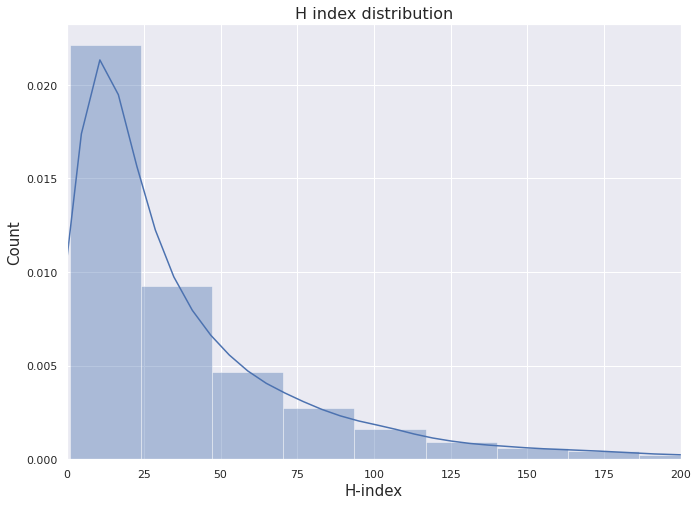

In [28]:

sns.set_style("darkgrid")
s = sns.distplot(sf_sjr["H index"])
plt.xlim(0,200)
s.set_title("H index distribution", fontsize=16)
s.set_ylabel("Count", fontsize=15)

s.set_xlabel("H-index",  fontsize=15)

In [ ]:
sf_sjr_g = sf_sjr.groupby('Publisher', {'Count': agg.COUNT()})
sf_sjr_g = sf_sjr_g.sort("Count", ascending=False)
top_10publishers = sf_sjr_g["Publisher"][:10]

# selecting only rows with publisher in the list above
sf_sjr2 = sf_sjr[sf_sjr["Publisher"].apply(lambda x: x in top_10publishers)]

sns.set_style("dark")
sns.set(rc={'figure.figsize':(11,8)}) # set figure size
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(sf_sjr2.to_dataframe(), row="Publisher", aspect=2, margin_titles=True)
g.map(plt.hist, "Cites / Doc. (2years)", color="r", bins=[0,2,4,6,8,10]).set(ylim=(0,8))